In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!pip install tensorflow --quiet

In [6]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [3]:
import h5py

# Open the file as read only
# User can make changes in the path as required

h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file

In [4]:
#checking the length of the train and test set
len(X_train), len(X_test)

(42000, 18000)

# Visualizing the Images

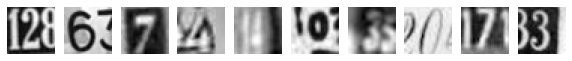

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [8]:
# Visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

# Data Preparation

In [9]:
# Shape and the array of pixels for the first image
print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [10]:
# Reshaping the dataset to flatten them. We are reshaping the 2D image into 1D array
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

In [11]:
# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
# New shape 
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


In [13]:
# One-hot encode output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# No.of classes
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

# Model Building

In [14]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

The sequential model will have:<br>
<li>1st layer with 64nodes and relu activation input shape(1024,)
<li>2nd layer 32 nodes relu activation
<li>output layer softmax with nodes equal to classes
<li>loss equal to categorical_crossentropy, Adam optimizer, learning rate=0.001 and metric accuracy.

In [17]:
# Define the model
from tensorflow.keras import losses
from tensorflow.keras import optimizers

# Create model
model1 = Sequential()  

model1.add(Dense(64, activation='relu', input_shape = (1024,)))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

# Compile the model
adam = optimizers.Adam(learning_rate=0.001)
model1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                65600     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Fit the model
model_1 = model1.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128, verbose=1)

Epoch 1/20
263/263 [==============================] - 3s 6ms/step - loss: 2.3007 - accuracy: 0.1141 - val_loss: 2.2694 - val_accuracy: 0.1525
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 2.1472 - accuracy: 0.2278 - val_loss: 1.9985 - val_accuracy: 0.2829
Epoch 3/20
263/263 [==============================] - 1s 5ms/step - loss: 1.8562 - accuracy: 0.3550 - val_loss: 1.7148 - val_accuracy: 0.4180
Epoch 4/20
263/263 [==============================] - 1s 5ms/step - loss: 1.6102 - accuracy: 0.4564 - val_loss: 1.5292 - val_accuracy: 0.4864
Epoch 5/20
263/263 [==============================] - 1s 5ms/step - loss: 1.4564 - accuracy: 0.5232 - val_loss: 1.4077 - val_accuracy: 0.5376
Epoch 6/20
263/263 [==============================] - 2s 6ms/step - loss: 1.3697 - accuracy: 0.5593 - val_loss: 1.3631 - val_accuracy: 0.5556
Epoch 7/20
263/263 [==============================] - 2s 8ms/step - loss: 1.3172 - accuracy: 0.5792 - val_loss: 1.3003 - val_accuracy: 0.5910
Epoch 

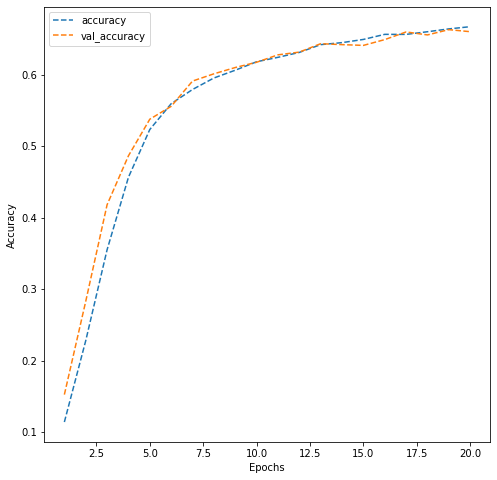

In [19]:
# Plotting the validation and training accuracies
dict_hist = model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

<b>Next we build another model with higher a complexity</b><br>



In [20]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [22]:
 #Define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers

# Create model
model2 = Sequential()  

model2.add(Dense(256, activation='relu', input_shape = (1024,)))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='softmax'))

# Compile model
adam = optimizers.Adam(learning_rate=0.0005)
model2.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               262400    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)              

In [23]:
model_2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=128, verbose=1)

Epoch 1/30
263/263 [==============================] - 6s 12ms/step - loss: 2.3374 - accuracy: 0.1029 - val_loss: 2.3058 - val_accuracy: 0.1092
Epoch 2/30
263/263 [==============================] - 4s 14ms/step - loss: 2.2158 - accuracy: 0.1539 - val_loss: 2.1663 - val_accuracy: 0.2448
Epoch 3/30
263/263 [==============================] - 4s 15ms/step - loss: 1.7252 - accuracy: 0.3918 - val_loss: 1.5989 - val_accuracy: 0.4875
Epoch 4/30
263/263 [==============================] - 3s 11ms/step - loss: 1.4240 - accuracy: 0.5238 - val_loss: 1.2962 - val_accuracy: 0.5742
Epoch 5/30
263/263 [==============================] - 3s 11ms/step - loss: 1.2421 - accuracy: 0.5943 - val_loss: 1.1814 - val_accuracy: 0.6225
Epoch 6/30
263/263 [==============================] - 3s 11ms/step - loss: 1.1818 - accuracy: 0.6160 - val_loss: 1.0895 - val_accuracy: 0.6490
Epoch 7/30
263/263 [==============================] - 5s 18ms/step - loss: 1.1195 - accuracy: 0.6405 - val_loss: 1.1064 - val_accuracy: 0.6383

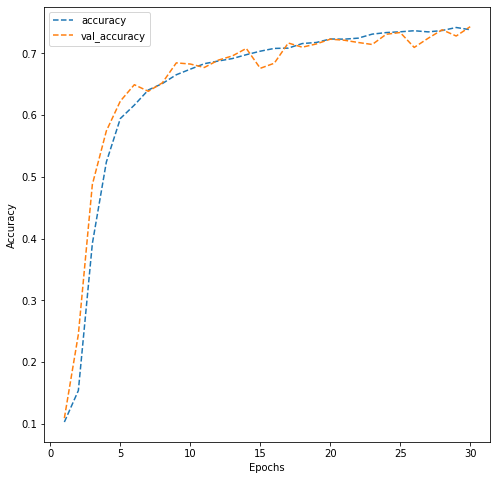

In [24]:
# Plotting the accuracies

dict_hist = model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

<b>The validation and training accuracy has improved.

# Predictions on the Test Data

In [25]:
test_pred = model2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

563/563 [==============================] - 2s 3ms/step


In [26]:
# Converting each entry to single label from one-hot encoded vector to print the classification report and confusion matrix 
y_test = np.argmax(y_test, axis=-1)

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1814
           1       0.77      0.79      0.78      1828
           2       0.67      0.82      0.74      1803
           3       0.66      0.74      0.70      1719
           4       0.82      0.78      0.80      1812
           5       0.77      0.65      0.71      1768
           6       0.78      0.70      0.74      1832
           7       0.77      0.79      0.78      1808
           8       0.68      0.72      0.70      1812
           9       0.73      0.72      0.72      1804

    accuracy                           0.74     18000
   macro avg       0.75      0.74      0.74     18000
weighted avg       0.75      0.74      0.74     18000



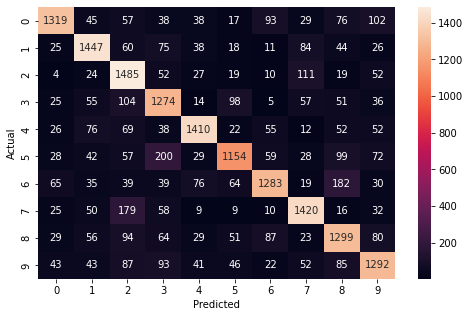

In [27]:
# Importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b>The accuracy on the test set is 78% 